<a href="https://colab.research.google.com/github/thgemanuel/Exercicio-4-Topicos-em-Inteligencia-Computacional/blob/main/Exercicio-4-Topicos-em-Inteligencia-Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios da semana
Aluno: Thiago Emanuel Silva Antunes Lopes
Profesora: Dr. Luciana Balieiro Cosme

# Proposta:
Para a base de dados Iris, você deve:

*   Explorar as demais características e mostrar resultados comparativos.
*   Testar com outro algoritmo de classificação e discutir os resultados.


# Metodo apresentado na aula:
Método MLP (supervisionado)

# Metodos escolhidos:
Método Naive Bayes (supervisionado) e 
Método Árvore de decisão (supervisionado)


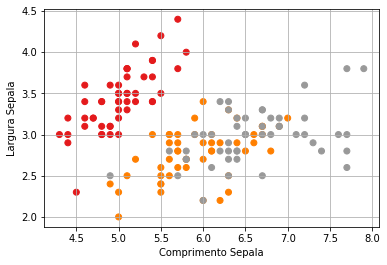

In [14]:
#iris dataset: Conjunto de dados consistem em 3 tipos diferentes de pétalas de íris (Setosa, Versicolour e Virginica) 
#e comprimento da sépala, arma
import numpy

#dados
from sklearn import datasets
#plot
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :2]  # as duas primeiras caracteristicas
y = iris.target #classificacadsadsa
#0 Comprimento da sépala; 1 Largura da sépala; 2 comprimento da pétala; Largura da pétala 
#setosa, versicolor, virginica
plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

# Conjunto de dados para treinamento e validação

In [15]:
#dados de treinamento 'até 40' de cada classe+
yt = numpy.concatenate([y[:40], y[51:90], y[101:140]])
xt = numpy.concatenate([X[:40,:], X[51:90,:], X[101:140,:]])


#validacão com o restante dos dados
yv=numpy.concatenate([y[40:50], y[90:100], y[140:150]])
xv = numpy.concatenate([X[40:50,:], X[90:100,:], X[140:150,:]])


# Algoritmo de classificação (MLP)

In [16]:
from sklearn.neural_network import MLPClassifier
import numpy
mlp = MLPClassifier(alpha=0.01,max_iter=2000)
mlp.fit(xt, yt)  
ypmlp=mlp.predict(xv)
falsepositive = (yv != ypmlp).sum()
print("Numero de tuplas classificadas de forma incorreta pelo Naive Bayes dos %d pontos : %d" % (xv.shape[0], falsepositive))

Numero de tuplas classificadas de forma incorreta pelo Naive Bayes dos 30 pontos : 4


# Algoritmo de classificaçao Bayesiano (Naive Bayes)

In [17]:
#Algoritmo de classificaçao Bayesiano (Naive Bayes)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(xt, yt)  
ypNB=gnb.predict(xv)
falsepositive = (yv != ypNB).sum()
print("Numero de tuplas classificadas de forma incorreta pelo Naive Bayes dos %d pontos : %d" % (xv.shape[0], falsepositive))

Numero de tuplas classificadas de forma incorreta pelo Naive Bayes dos 30 pontos : 4


# Algoritmo de arvores de decisão

In [18]:
#algoritmo de arvores de decisão
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
clf.fit(xt, yt)  
ypDT=clf.predict(xv)
falsepositive = (yv != ypDT).sum()
print("Numero de tuplas classificadas de forma incorreta pelo Decision Tree dos %d pontos : %d" % (xv.shape[0], falsepositive))

#algoritmo baseado em arvores de decisão (Random Forests) somente para testes
clfRF = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clfRF.fit(xt, yt)  
ypRF=clfRF.predict(xv)
falsepositiveRF = (yv != ypRF).sum()
print("Numero de tuplas classificadas de forma incorreta pelo Random Forest dos %d pontos : %d" % (xv.shape[0], falsepositiveRF))


Numero de tuplas classificadas de forma incorreta pelo Decision Tree dos 30 pontos : 10
Numero de tuplas classificadas de forma incorreta pelo Random Forest dos 30 pontos : 7


# Matriz de confusão

Matriz de confusao do MLP
[[0.9 0.1 0. ]
 [0.  1.  0. ]
 [0.  0.3 0.7]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.71      1.00      0.83        10
           2       1.00      0.70      0.82        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.87        30
weighted avg       0.90      0.87      0.87        30



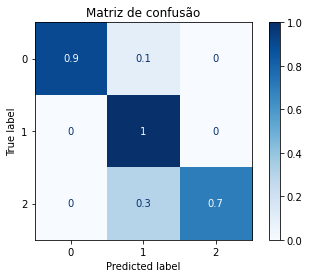

---------------------------------------
Matriz de confusao do Naive Bayes
[[0.9 0.1 0. ]
 [0.  1.  0. ]
 [0.  0.3 0.7]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.71      1.00      0.83        10
           2       1.00      0.70      0.82        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.87        30
weighted avg       0.90      0.87      0.87        30



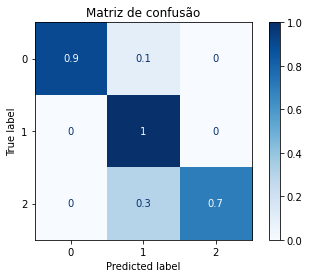

---------------------------------------
Matriz de confusao do Decision Tree
[[0.9 0.1 0. ]
 [0.  0.7 0.3]
 [0.  0.6 0.4]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.50      0.70      0.58        10
           2       0.57      0.40      0.47        10

    accuracy                           0.67        30
   macro avg       0.69      0.67      0.67        30
weighted avg       0.69      0.67      0.67        30



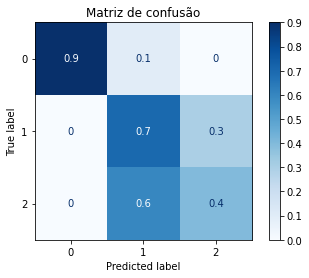

---------------------------------------
Matriz de confusao do Random Forest
[[0.9 0.1 0. ]
 [0.  0.9 0.1]
 [0.  0.5 0.5]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.60      0.90      0.72        10
           2       0.83      0.50      0.62        10

    accuracy                           0.77        30
   macro avg       0.81      0.77      0.76        30
weighted avg       0.81      0.77      0.76        30



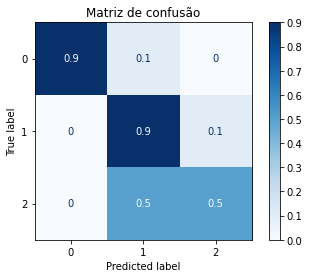

In [24]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import plot_confusion_matrix

print("Matriz de confusao do MLP")  
disp = plot_confusion_matrix(mlp, xv, yv, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Matriz de confusão")

print(disp.confusion_matrix)
print(classification_report(yv,ypmlp))
plt.show()
print("---------------------------------------")  

print("Matriz de confusao do Naive Bayes") 
disp = plot_confusion_matrix(gnb, xv, yv, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Matriz de confusão")

print(disp.confusion_matrix)
print(classification_report(yv,ypNB))
plt.show()
print("---------------------------------------")  

print("Matriz de confusao do Decision Tree")  
disp = plot_confusion_matrix(clf, xv, yv, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Matriz de confusão")

print(disp.confusion_matrix)
print(classification_report(yv,ypDT))
plt.show()
print("---------------------------------------")  

print("Matriz de confusao do Random Forest")  
disp = plot_confusion_matrix(clfRF, xv, yv, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Matriz de confusão")

print(disp.confusion_matrix)
print(classification_report(yv,ypRF))
plt.show()